In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
donuts = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv")

donuts.head()

#donuts.isnull().sum()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


#a)

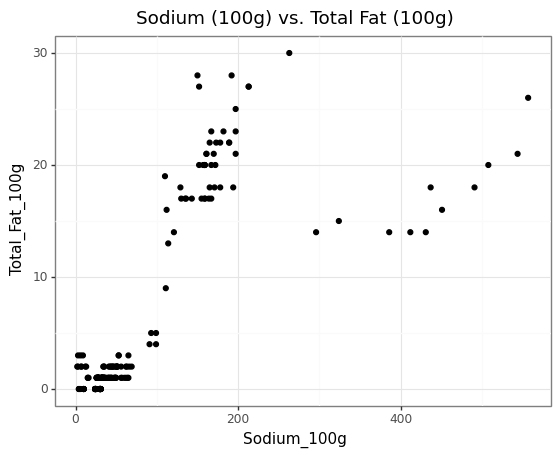

<ggplot: (8736545964129)>

In [ ]:
(ggplot(donuts, aes(x = "Sodium_100g", y = "Total_Fat_100g")) + geom_point()+ theme_bw() + labs(title = 'Sodium (100g) vs. Total Fat (100g)'))

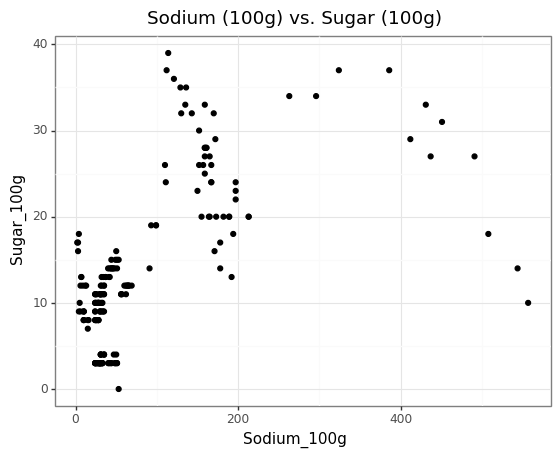

<ggplot: (8736545798235)>

In [ ]:
(ggplot(donuts, aes(x = "Sodium_100g", y = "Sugar_100g")) + geom_point()+ theme_bw() + labs(title = 'Sodium (100g) vs. Sugar (100g)'))

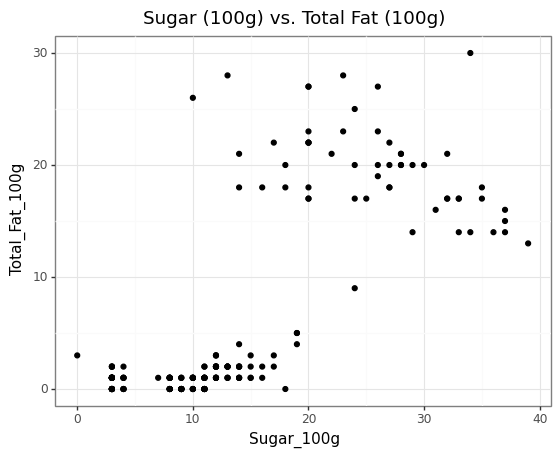

<ggplot: (8736545849850)>

In [ ]:
(ggplot(donuts, aes(x = "Sugar_100g", y = "Total_Fat_100g")) + geom_point()+ theme_bw() + labs(title = 'Sugar (100g) vs. Total Fat (100g)'))

#b)
To begin, I dont think that **K-Means** would be the best possible clustering method for these parameters in this data set. **K-Means** assumes that the clusters are spherical, meaning the data points are about equally spread apart in every direction and the variances are the same, and this doesn't seem to be the case shown by the graphs above. The shape for many of them is more elongated. It is also important to note that it doesn't look like the each cluster will have roughly the same number of data points which is another assumption that **K-Means** relys on and wouldn't make this method very effective or practical. Also, the biggest issue that I see between both **K-Means** and **Gaussian** is that when calculating, you have to specify the number of clusters that you are looking for in n_cluster or n_components if you are doing **Gaussian**. Looking at the graphs above, it looks like some would be better suited for three clusters while the graph between Sodium vs Fat would only need two. Forcing a third split or not having enough clusters will make the sillohuete score go down and wont accurately capture the best groupings.

While I dont believe that **Gaussian Mixture Models(EM)** would be the best way to cluster this data set, I think that it would do a better job than **K Means**. Primarily, this is due to the fact that the variances for **EM** aren't assumed to be the same, which would work a lot better for clustering this data due to their more eliptical shape. Additionally, **EM** calculates soft assignment of clusters so we would be able to take into account the probability that a point would be in either cluster. However, this is most effective when the clusters are overlapping and there is a bigger question of how to classify each data point. Looking at the graphs above, it looks like the probable clusters are pretty separate from one another, so the soft clustering isn't as useful in this sense and another method could do a better job of clustering.

For **Hierarchical Clustering**, I also don't think that this would be an effective clustering method to use. **HAP** starts with each data point being its own cluster and then continues to merge them based on a chosen linkage criteria until there is only one cluster left. This models the relationships between all the clusters and while this can be useful in data that is very highly related like blood and all of its components, this doesn't really apply to our donuts data set. There aren't hierarchical relationships to be found in this dataset so we would want to go with a different method.

I think that **DBSCAN** would be the best clustering method for this data based on the graphs above. **DBSCAN** is able to put data points in clusters and also cladssify ones that don't fit the specificed criteria into a noise category. I think that this will be very effective for our data because as seen by the graphs above, they all seem pretty cohesive, minus a few outliers, and **DBSCAN** will be able to catch that. Also, it does a great job of classifying clusters that are spread apart from each other which can be seen above. It doesn't do great when they overlap, unlike **Gaussian** but this wont be an issue on our case. Also, **DBSCAN** doesn't look for a specific shape for its clusters, unlike **K Means**, and will be more effective at capturing the odd-shaped clusters. We also get to set the hyperparameters which includes the minimum amount of density we need to determine a cluster (minimum points) and how far from the data point we look for neighbors (epsilon) which will be useful in order to make the most separate and cohesive clusters.





#c)


In [ ]:
z = StandardScaler()
vars = ["Sugar_100g","Total_Fat_100g", "Sodium_100g"]
X = donuts[vars]
X[vars] = z.fit_transform(X[vars])

##BEST - DBSCAN

In [ ]:
mins = 10
nn = NearestNeighbors(n_neighbors = mins + 1)
nn.fit(X)
distances, neighbors = nn.kneighbors(X)

distances = np.sort(distances[:, mins], axis = 0)

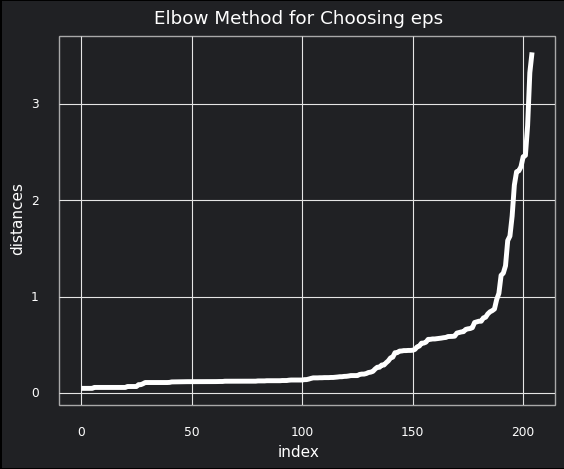

<ggplot: (8736546147904)>

In [ ]:
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})

plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

In [ ]:
db = DBSCAN(eps = 0.80, min_samples = 10).fit(X[vars])

labsList = ["Noise"]
labsList = labsList  + ["Cluster" + str(i) for i in range(1,len(set(db.labels_)))]

donuts["assignments"] = db.labels_
donuts_clustered = donuts.loc[(donuts.assignments >= 0)]

silhouette_score(donuts_clustered[vars], donuts_clustered["assignments"])

0.8067279348968661

###Choosing hyperparameters - DBSCAN
The first thing that I did was create the entire model with untuned values that I chose soley based on my observations from the graphs above and printed out the silohuette score to test. For mins and min_samples, I looked at the graphs printed above to get a visual estimate of how many points tend to fall in each cluster. I used this as a starting point and then tried different values to see which outputted the best silohuette score and looked the best on the graphs below. I found this value to be 10. Then to find the eps for DBSCAN, I created k-dist graph and looked to find the elbow/inflection point. That looked to be around 0.80, so I replaced my old value with 0.80.

##WORST -- Hierarchical

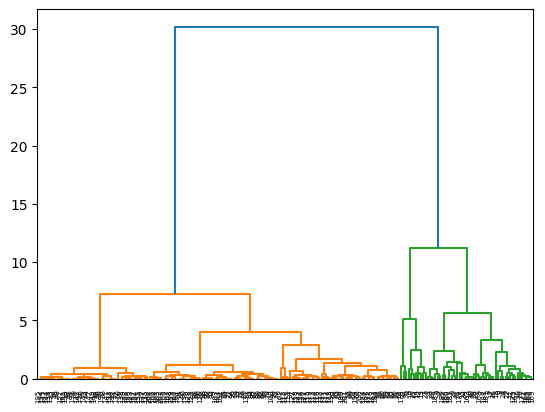

In [ ]:
hac = AgglomerativeClustering(affinity = "euclidean", n_clusters = 3,
                             linkage = "ward")

hac.fit(X)

dendro = sch.dendrogram(sch.linkage(X, method='ward'))

In [ ]:
membership = hac.labels_
donuts["clusterHAC"] = membership
silhouette_score(X[vars],membership)

0.7386187851617936

###Choosing hyperparameters - HAC

For HAC, I had to choose the distance metric, number of clusters, and the linkage criteria. For the distance metric I chose euclidean because the data that we are working with is all continuous, and so this metic is the only one applicable for out data set. For the number of clusters, this one was a little harder because between the three graphs above, it looks like sodium vs fat and sodium vs. sugar would both be split up in to three clusters, but sugar vs fat looks to only have two distinct clusters. Because I estimated that the majority of would reasonably three clusters, I ultimately chose three for the best overall outcome. For the linkage criteria, I did some trial and error to see which of the four, single, complete, average, and wards, yeilded the best and worst overall sillohuete score. Single did by far the worst with a score of around 0.50 and wards did the best with 0.73, which I ended up choosing.

#d)

###Performance of the models
I used the silohuette score to assess the performance of the models. The silhouette score ranges from -1 to 1, with -1 being the worst possible score and 1 being the best. This metric does a good job of providing model feedback because it is a calculation that includes both cohesion and separation of the clusters. A score of 1 means that it is perfectly separate and cohesive. The DBSCAN model has a pretty high score of around 0.81, implying that the clusters it identified are both separate and cohesive. For HAC, the silhouette score was a lot lower at 0.73. Still, this is a pretty good score and shows that this model also does a good job at identifying clusters that are both cohesive (points are close to each other in a cluster) and separate (points are far from points in other clusters).

## DBSCAN Graphs

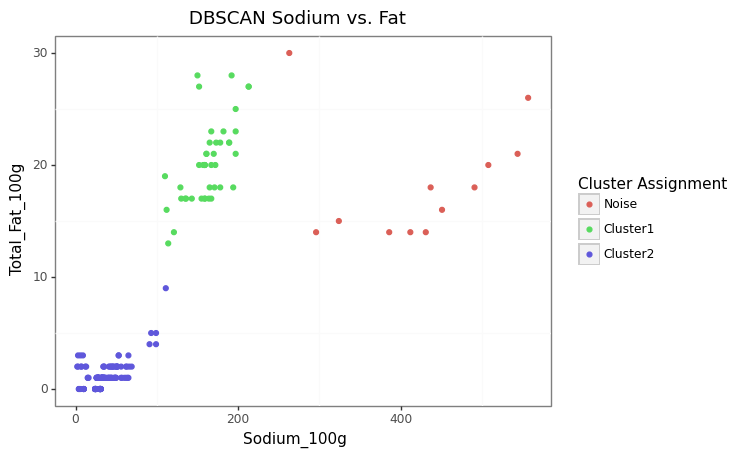

<ggplot: (8736544354458)>

In [ ]:
(ggplot(donuts, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(assignments)")) +
 geom_point() +
 theme_bw() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = " DBSCAN Sodium vs. Fat"))



###Characterizing clusters Fat vs. Sodium

For the red cluster (noise) these donuts are high in fat and relatively higher in sodium compared to the other clusters. I would guess that these donuts might be specialty donuts, maybe contains ones that have peanut butter or salted caramel in them which could drive up both the fat and sodium content. Typical flavored donuts probably dont have that much sodium or fat, so I would assume that this group must have interesting flavors and fun toppings.

I would say that the green cluster (cluster1) are the generic donuts. Basic donuts like glazed, chocolate, and sprinkled shouldn't have too high of sodium or fat and I would expect them to fall in this middle category.

Cluster 2 is probably going to be the healthier donuts that are purposely lower in fat and sodium. They may use healthier alternatives as ingredients which would explain why some of the donuts in this cluster have almost no fat or sodium.

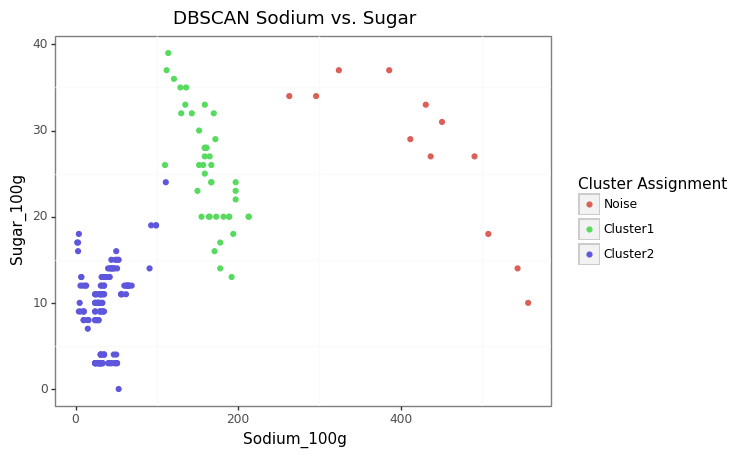

<ggplot: (8736546185861)>

In [ ]:
(ggplot(donuts, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(assignments)")) +
 geom_point() +
 theme_bw() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN Sodium vs. Sugar"))

###Characterizing clusters Sugar vs. Sodium

These clusters are very similar to the graph above and I would classify them in the same way.

The noise cluster has outliers with the highest sugar and sodium content. I would assume these are donuts that have a lot of toppings or heavier flavors. These could include filled donuts.

Cluster1 is the middle ground. These can be classified as your generic and most popular donut flavors with an average amount of sodium and sugar.

The last cluster, Cluster2, is on the healthier side of donuts. These donuts may have sugar alternatives in them and use less sodium dense ingredients making them have the lowest amount of both sugar and sodium.


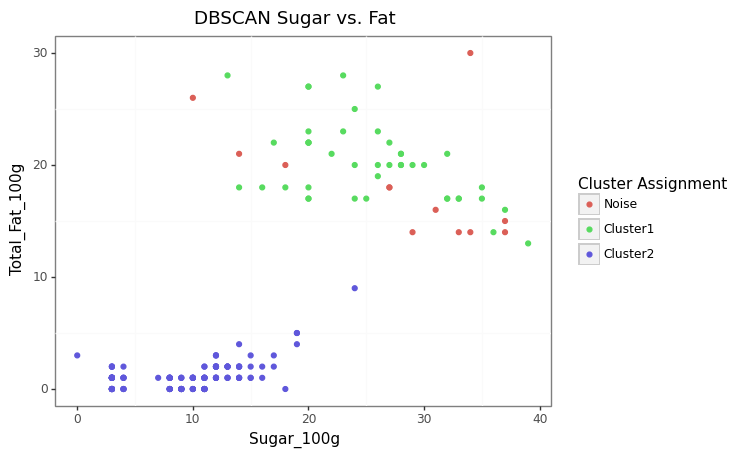

<ggplot: (8736544637076)>

In [ ]:
(ggplot(donuts, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = "factor(assignments)")) +
 geom_point() +
 theme_bw() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN Sugar vs. Fat"))

###Characterizing clusters Fat vs. Sugar

For the the blue cluster (cluster2) I would say that this cluster is a mix of generic donuts (chocolate, glazed, etc.) and donuts that are made to be healthier. This cluster is more horizontally stretched and I think that the donuts closest to the origin are the healthy donuts that are made specifically for people who may be on a diet and want a healthy treat. The donuts more to the right with sligthly higher sugar content are the typical flavored donuts. They tend to be lower in sugar and fat because they are simple and dont contain a ton of toppings or additional ingredients, but higher in sugar than the healthy donuts because they may not use sugar alternatives.

The green cluster (cluster1) would be the specialty donuts as they have the highest sugar and fat. They probably are filled, have a lot of toppings, or are bigger than a normal donut.

The noise cluster has points scattered around the specialty donuts cluster. These donuts are also probably specialty donuts as well but have components that make them stand out from most other special donuts like being extremely high in fat and sugar or being high in one but not the other.


##HAC Graphs

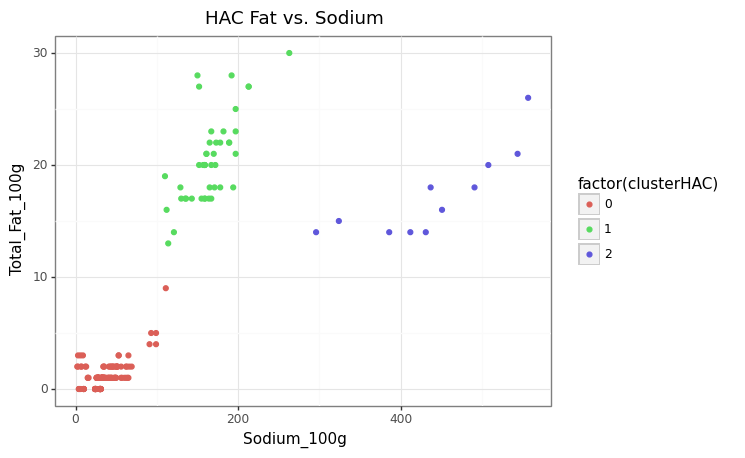

<ggplot: (8736544739819)>

In [ ]:
(ggplot(donuts, aes(x = "Sodium_100g", y = "Total_Fat_100g")) + geom_point(aes(color = "factor(clusterHAC)")) + theme_bw() + labs(title = "HAC Fat vs. Sodium"))

###Characterizing clusters Fat vs. Sodium

For the blue cluster (2) these donuts are high and fat and realatively higher in sodium compared to the other clusters. I would guess that these donuts might be specialty donuts; Ones that have more ingredients in them which would drive up both the fat and sodium content. Typical flavored donuts probably dont have as much sodium or fat, so I would assume that this group must have interesting flavors and fun toppings. The sodium is similar between cluster 2 and in cluster 1, but this would make sense because there donuts dont tend to be salty in general and wont go past a certain, relatively small range.

The green cluster's data points (cluster1) are the generic, most popular donut flavors. Basic donuts like glazed, chocolate, and sprinkled dont have too high of sodium or fat content and I would expect them to be in the middle for sodium and fat.

The red cluster (0) is classified as healthy donuts that are lower in fat and sodium. The ingredients could include healthier alternatives which would explain why some of the donuts in this cluster have almost no fat or sodium at all.

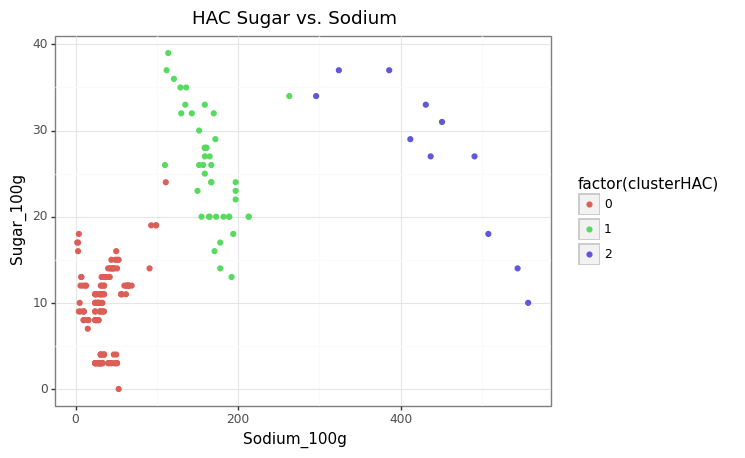

<ggplot: (8736544644087)>

In [ ]:
(ggplot(donuts, aes(x = "Sodium_100g", y = "Sugar_100g")) + geom_point(aes(color = "factor(clusterHAC)")) + theme_bw() + labs(title = "HAC Sugar vs. Sodium"))

###Characterizing clusters Sugar vs. Sodium

These clusters are again very similar to the Fat vs. Sodium graph.

The blue cluster, 2, has donuts with the highest sugar and sodium content. I would assume these are donuts that have a lot of toppings or heavier flavors. These could include filled donuts and specialty donuts that would make them have more sugar and salt.

Cluster 1 is your average donuts. These can be classified as your generic and most popular donut flavors that fall in the middle between the two more extreme categories.

The last cluster, Cluster 0, is on the healthier side of donuts. These donuts may have sweetner alternatives in them, like stevia or fruit, but again, the sugar content fluxuates more than sodium in all the clusters because most donuts aren't going to contain a lot of sodium dense ingredients.

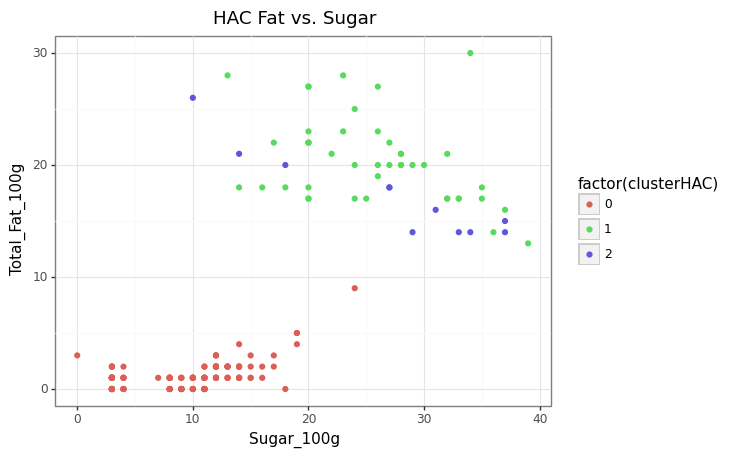

<ggplot: (8736544188919)>

In [ ]:
(ggplot(donuts, aes(x = "Sugar_100g", y = "Total_Fat_100g")) + geom_point(aes(color = "factor(clusterHAC)"))+ theme_bw()+ labs(title = "HAC Fat vs. Sugar"))

###Characterizing clusters Fat vs. Sugar

For the the red cluster (cluster 0) I would say that this cluster is a mix of generic donuts (chocolate, glazed, etc.) and donuts that are made to be healthier. This cluster is more spread out along the x-axis and I think that the donuts closest to the origin are the healthy donuts that are made specifically to be healthy. The donuts more to the right are the typical flavored donuts becuase the fat stays pretty much the same but the sugar increases pretty significantly. They do still tend to be lower in sugar and fat that a specialty donut because they are simpler and dont contain a ton of toppings or additional ingredients.

The green cluster (cluster1) would be the specialty donuts as they have the highest sugar and fat. They probably are filled, have a lot of toppings, or are bigger than a normal donut.

The last cluster, cluster 2, has points scattered around the specialty donuts cluster. These donuts could also probably classified as specialty donuts as well but have components that make them stand out from the other special donuts. For example donuts in this cluster are extremely high in fat and sugar or some are high in one, either fat or sugar, but not the other which is slightly different.

#e)

In [ ]:
z2 = StandardScaler()
vars2 = ["Sugar_100g","Total_Fat_100g", "Sodium_100g", "Protein_100g"]
X2 = donuts[vars2]
X2[vars2] = z2.fit_transform(X2[vars2])


mins2 = 10
nn2 = NearestNeighbors(n_neighbors = mins + 1)
nn2.fit(X2)


NearestNeighbors(n_neighbors=11)

In [ ]:
db2 = DBSCAN(eps = 0.8, min_samples = 10).fit(X2[vars2])

labsList = ["Noise"]
labsList = labsList  + ["Cluster" + str(i) for i in range(1,len(set(db.labels_)))]

donuts["assignments2"] = db2.labels_
donuts_clustered2 = donuts.loc[(donuts.assignments2 >= 0)]

silhouette_score(donuts_clustered2[vars2], donuts_clustered2["assignments2"])

0.8455191709745131

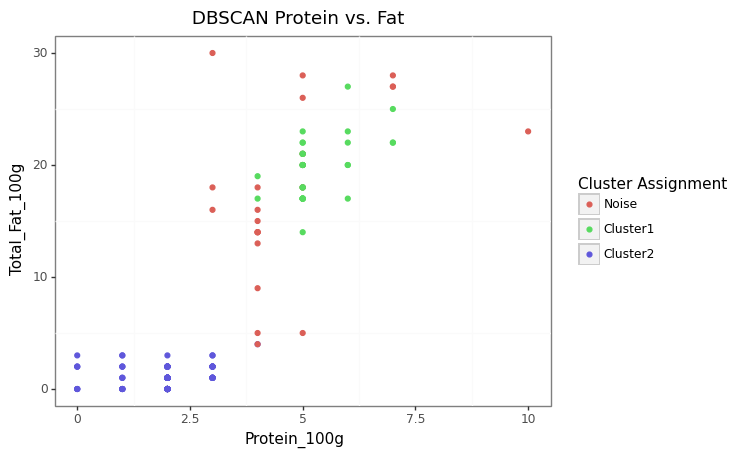

<ggplot: (8736544128723)>

In [ ]:
(ggplot(donuts, aes(x = "Protein_100g", y = "Total_Fat_100g", color = "factor(assignments2)")) +
 geom_point() +
 theme_bw() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = " DBSCAN Protein vs. Fat"))


###Explanation

I decided to include protein as the new variable in my model. As seen by the silohuette score, there was a decent improvement with the addition of this new variable, going from 0.806 to 0.845. This shows that the overall cohesion and separtion of the clusters improved when we added protein. Protein doesn't have a very wide range of potential values so the data points are pretty cohesive as many of them have the exact same amount of protein.

I selected this variable in particular based on my knowledge of donuts and my observations from the relationships formed by the clusters above. I would expect that the healthier/more simple donuts would tend to have less protein because protein is associated with containing more ingredients that may also be linked to higher fat or sodium. The average glazed donut has less that 4 grams of protein so I am assuming other donuts with similar characterists would have similar levels (Healthline). The specialty donuts would be expected to have more protein because they have interesting toppings and ingredients that may contain higher levels of protein, like peanut butter or a filled donut that uses milk as a base.

Seen by the graph above, this assumption is correct as it relates to fat. Excluding noise, the two main clusters are donuts with low fat and low protein (the healthy/simple donuts) and donuts with higher fat and protein (special donuts).

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/Project2.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "Project2.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpdfbox-java libptexenc1 libruby2.7 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-minitest ruby-net-telnet
  ruby-power-assert ruby-test-unit ruby-xmlrpc ruby2.7 rubygems-integration
  t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-g